# Project 7 - Applied Analytics
**Name:** Kayla Breum

**Date:** 2/19/2024

The purpose of this project is to demonstrate an introductory exploration of machine learning, utilizing skills with Jupyter, pandas, Seaborn, and other popular tools for data analytics.

## Import Dependencies

In [336]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

## Part 1 - Chart a Straight Line

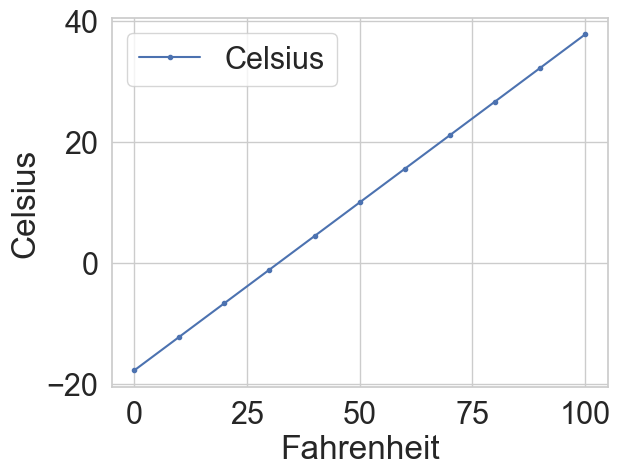

In [279]:
c = lambda f: 5/9* (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


## Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [280]:
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [281]:
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [282]:
df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [283]:
df.columns = ['Date', 'Temperature', 'Anomaly']
df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [284]:
df.Date.dtype

dtype('int64')

In [285]:
df.Date = nyc.Date.floordiv(100)
df.head(3)

,Date,Temperature,Anomaly
0,18,34.2,-3.2
1,18,34.7,-2.7
2,18,35.5,-1.9


### Section 4 - Descriptive Statistics

In [286]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [287]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)
linear_regression.slope

0.014771361132966163

In [288]:
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [289]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [290]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7 - Visualizations

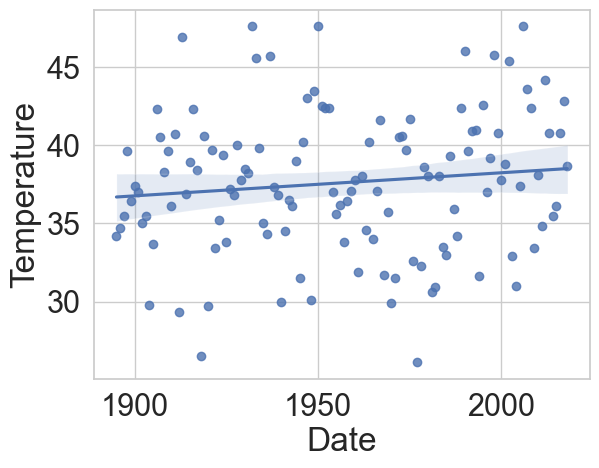

In [291]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

## Part 3 - Predict Avg High Temp in NYC in January

### Section 1 - Build the Model

In [292]:
x_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [293]:
X_train.shape

(15480, 8)

In [294]:
X_test.shape

(31, 1)

In [295]:
linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

LinearRegression()

In [296]:
linear_regression.coef_

array([0.01939167])

In [297]:
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

In [298]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [299]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2019)

array([38.84399018])

In [300]:
predict(1890)

array([36.34246432])

In [301]:
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

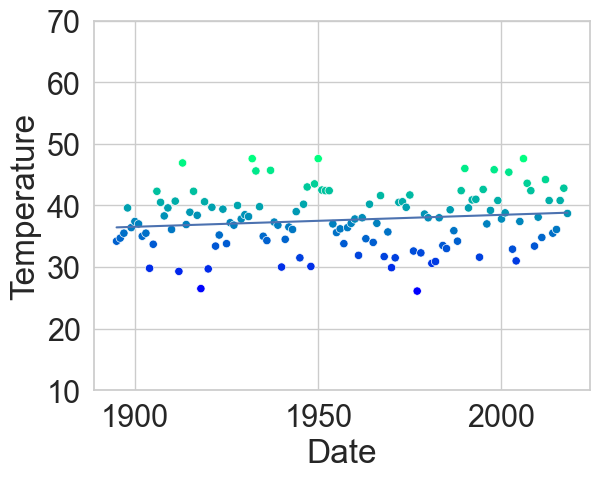

In [302]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', 
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Comparison Insights

### Performance

Simple linear regression works well when the relationship is linear. However, time series data can often show temporal patterns, seasonality, and trends that might not be able to be fully caputred by a linear model. Additionally, it only showed us a snapshot of the the data we already had. However, using scikit-learn's linear regression allows for more flexibility and can potentially caputre more complex relationships in the data. It also allows for us to predict future trends based on our current data.

### Complexity

Simple linear regression in a time series is pretty straightforward to implement because it involves modeling the relationship between time and the target variable using a linear equation. In comparison, utilizing scikit-learn's linear regression provided a more generalized approach that could work for various types of data, not just time series.

### Selection

I would choose the simple linear regression if I wanted a quick and interpretable model and I knew the relationship of my data was linear. But if the data had more complex patterns and/or I wanted to start making predictions for future dat, I would utilize the machine learning.

### Visualization

The simple linear regression provided a clear visual representation and it was easy to understand the model's fit. The plot felt intuitive and easy to interpret. If presenting this, I could easily highlight how the model caputres the linear relationship over time. On the other hand, using supervised machine learning allowed for a more comprehensive view of the model's behavior, so I could focus on theflexibility and potential feature engineering.

## Bonus - California Housing Project

### Section 1 - Data Acquisition

In [303]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

### Section 2 - Data Inspection

In [304]:
print(california.DESCR)
_california_housing_dataset: "California Housing dataset"

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [305]:
california.data.shape

(20640, 8)

In [306]:
california.target.shape

(20640,)

In [307]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Section 3 - Data Exploration

In [308]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

In [309]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)

In [310]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


### Section 4 - Descriptive Statistics

In [311]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Section 5 - Visualization

In [312]:
sample_df = california_df.sample(frac=0.1, random_state=17)

In [313]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

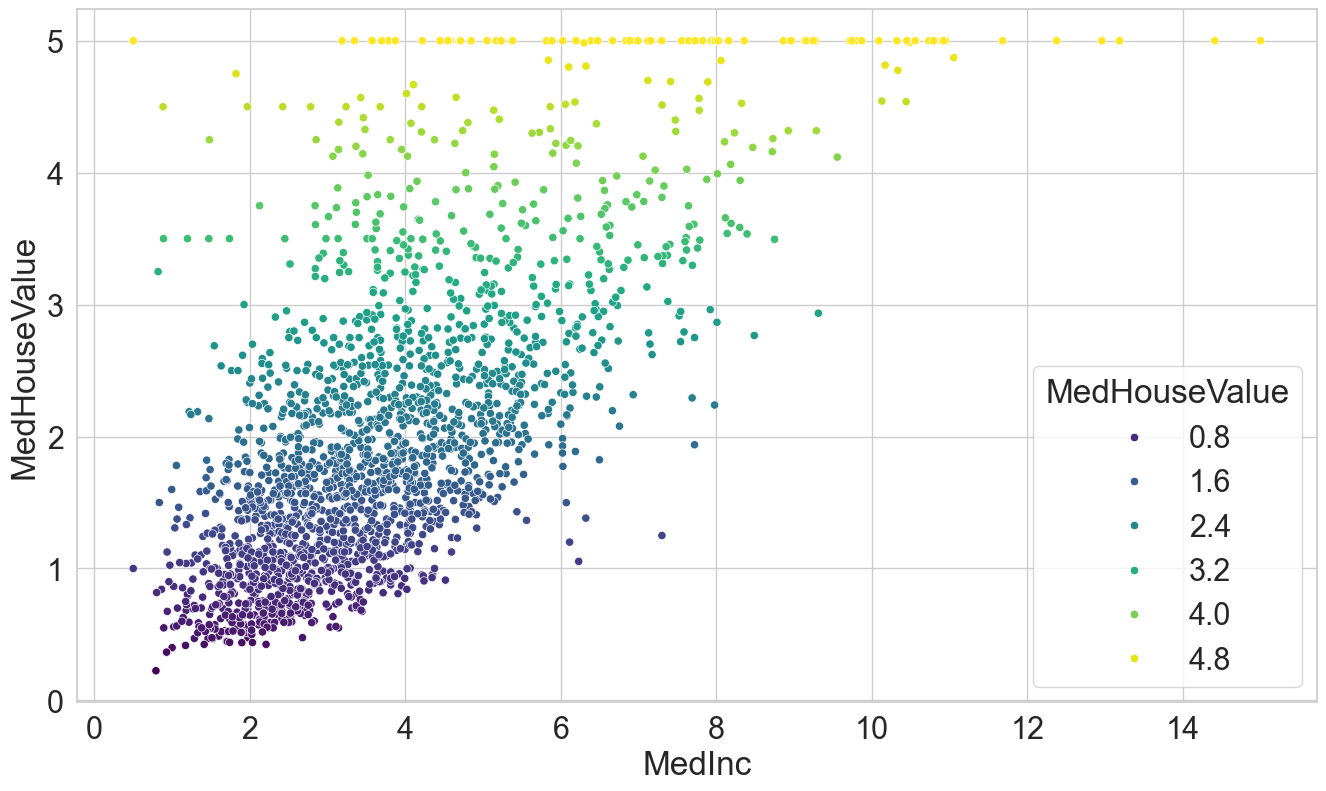

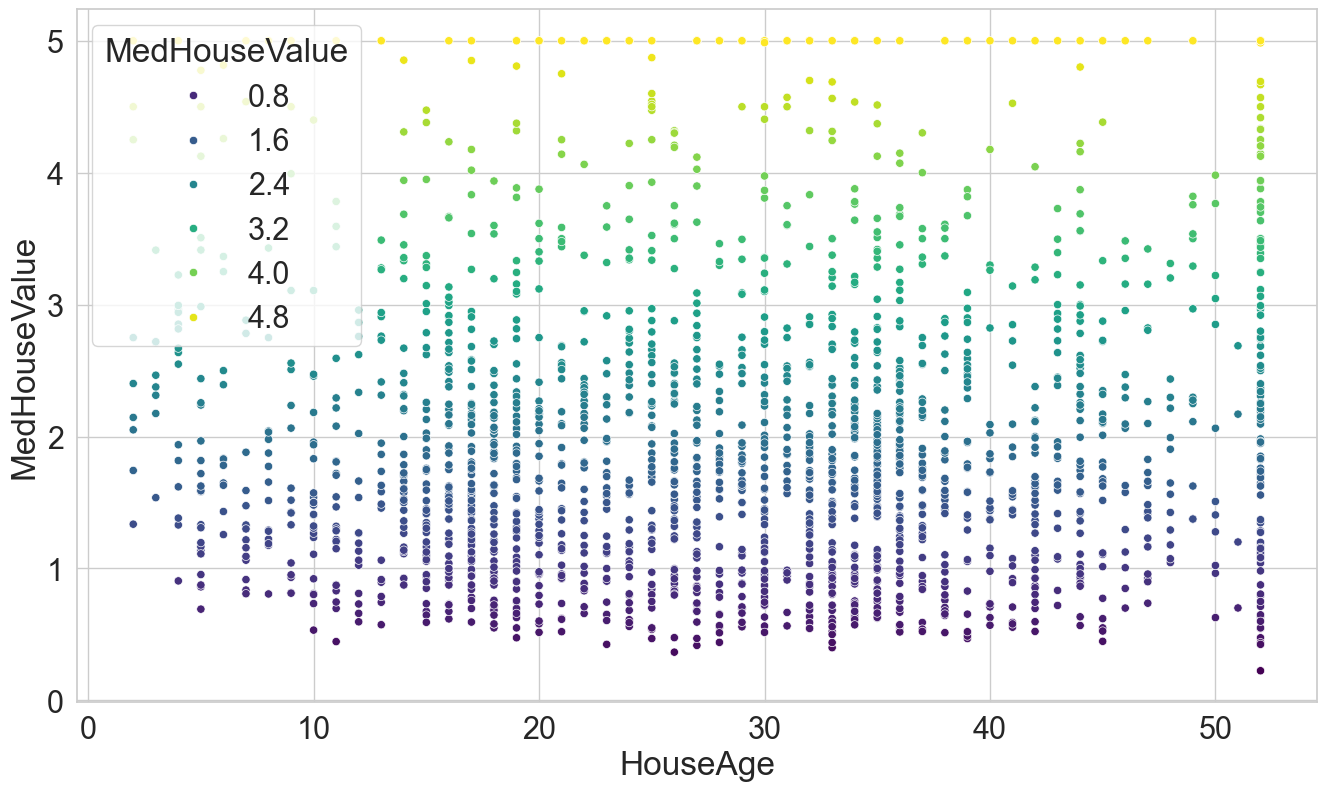

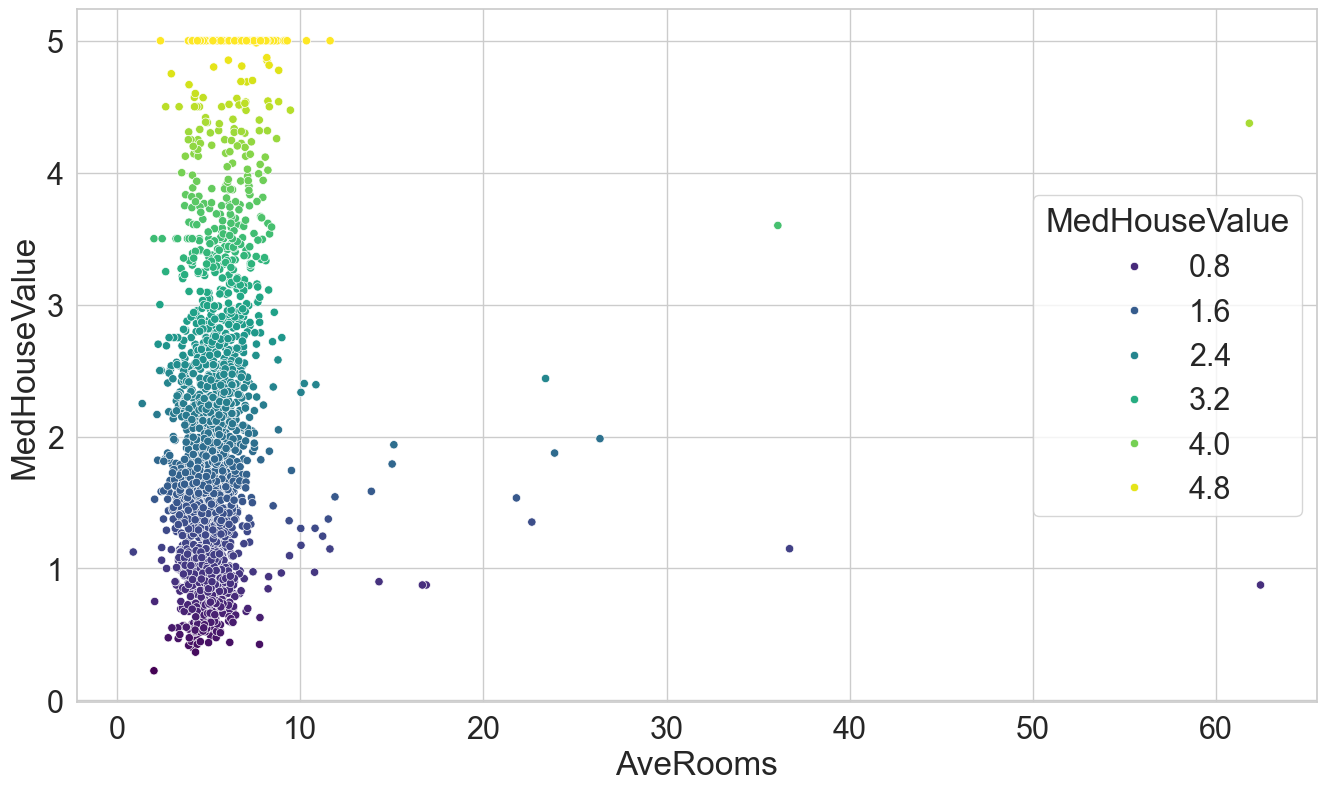

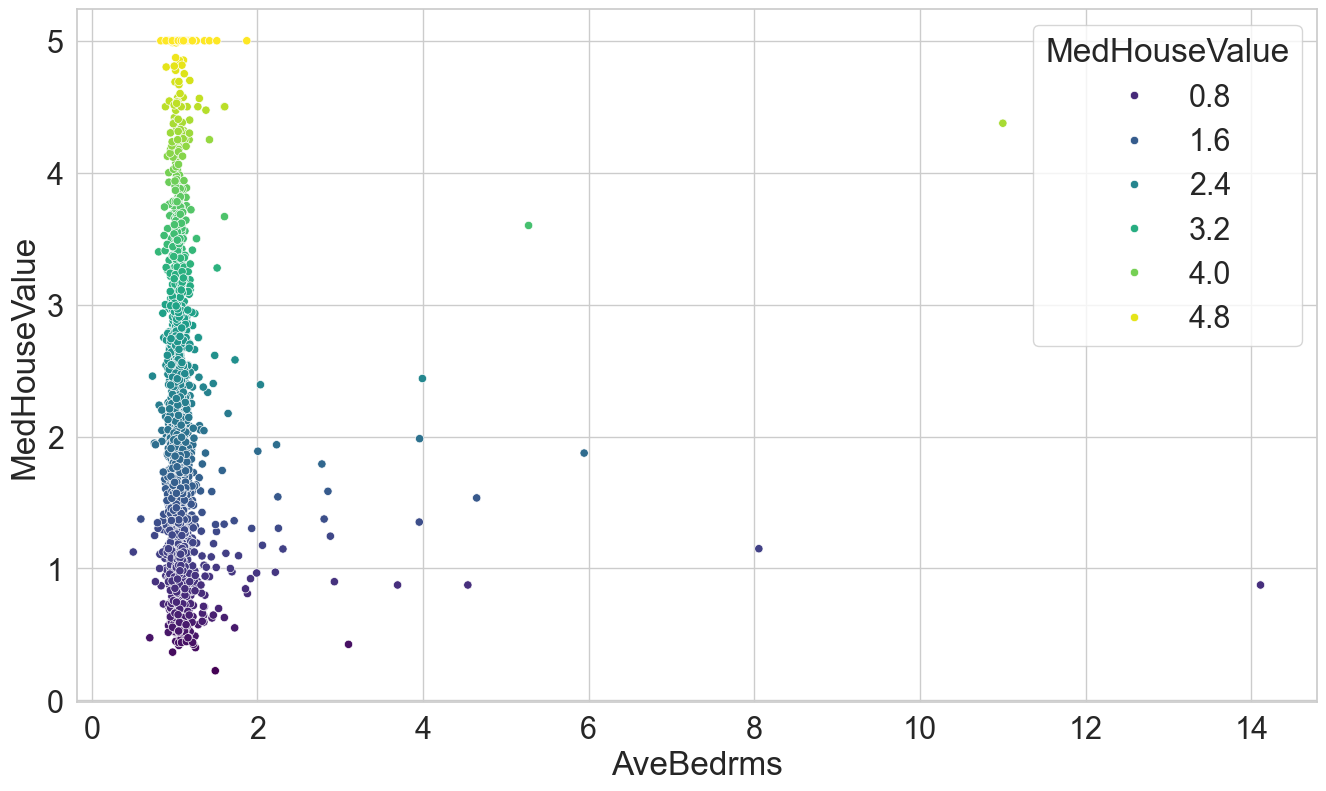

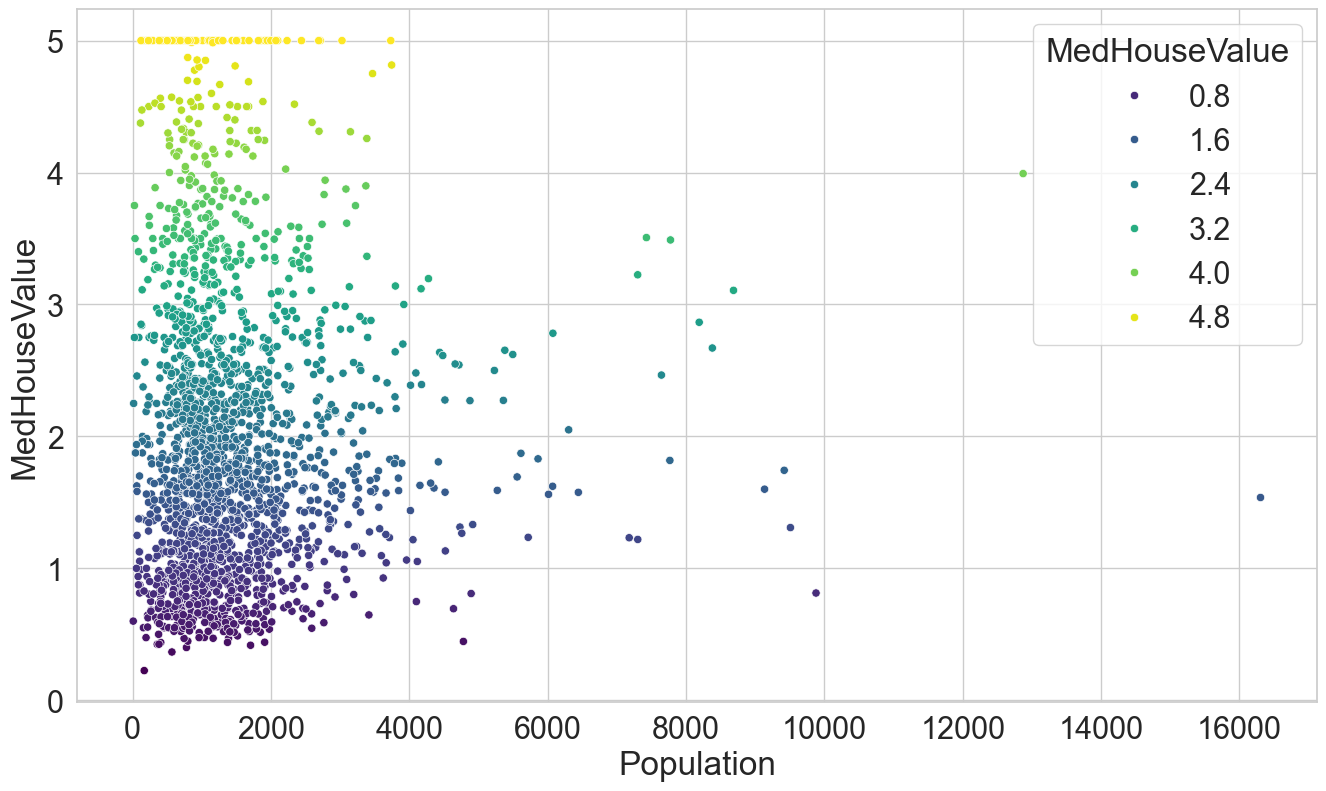

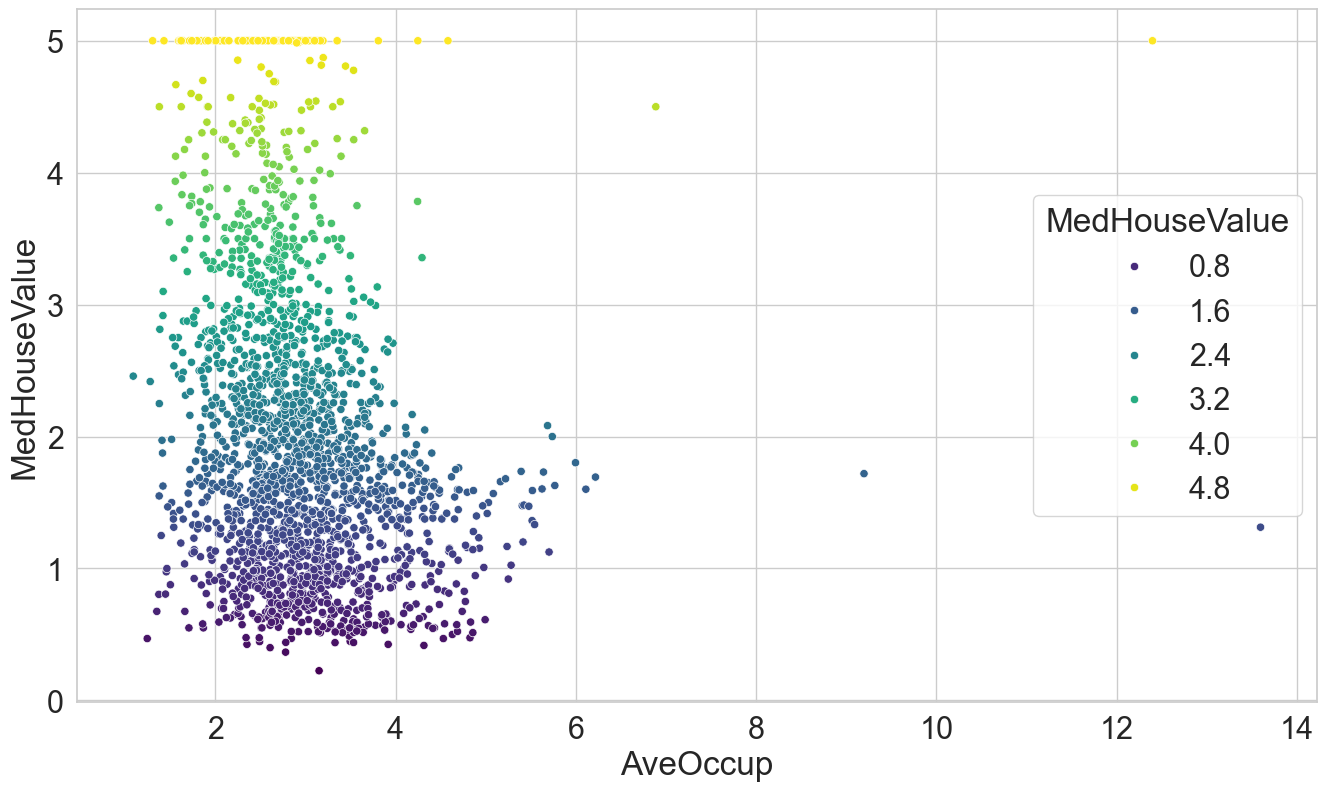

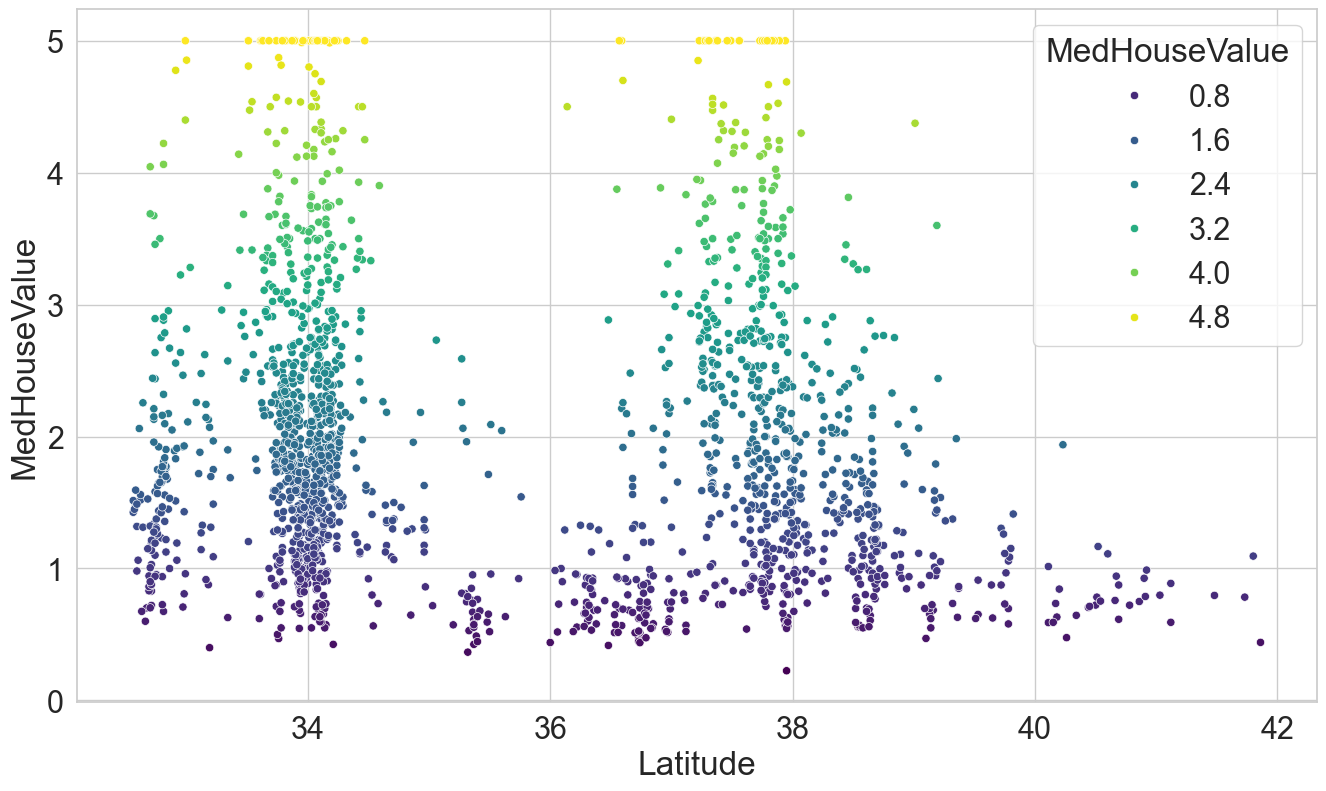

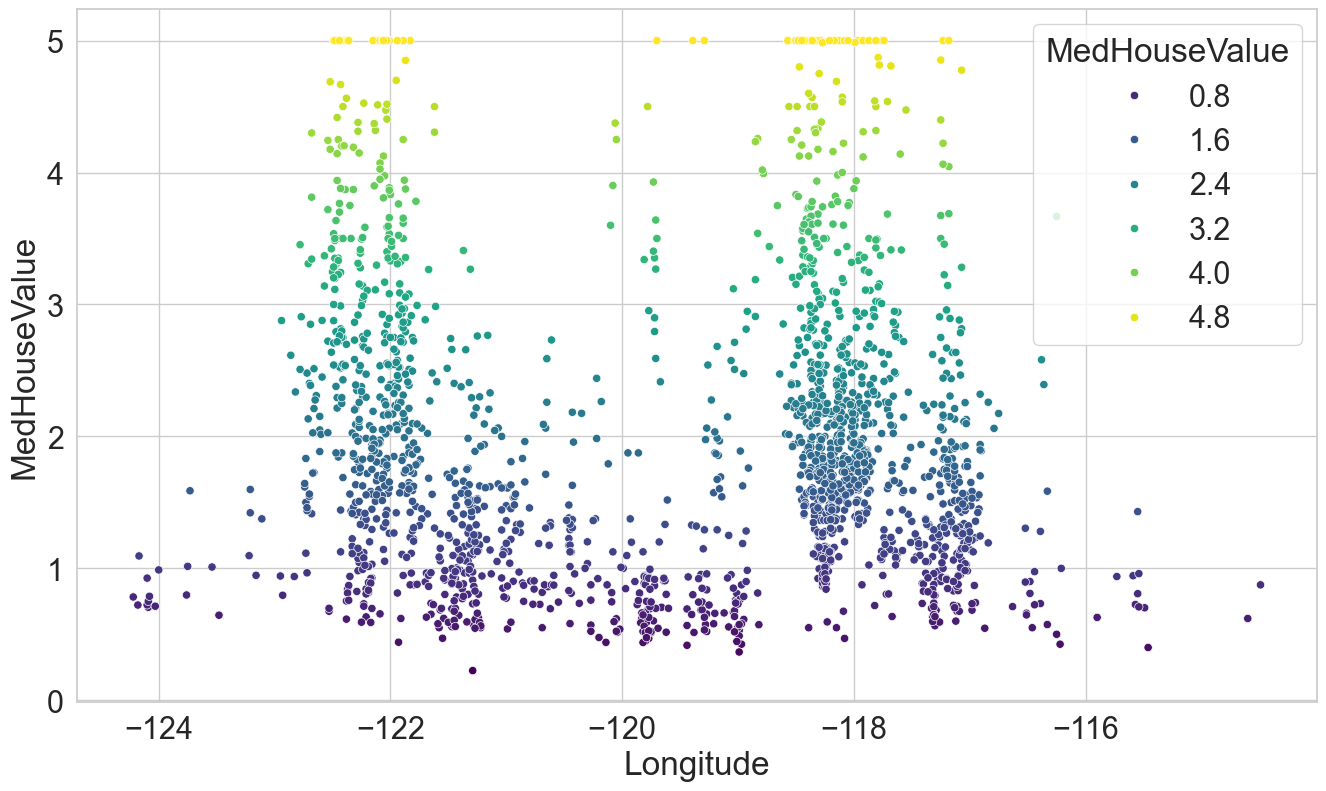

In [314]:
for feature in california.feature_names: 
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='viridis', legend=True)

### Section 6 - Build the Model

In [315]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

In [316]:
X_train.shape

(15480, 8)

In [317]:
X_test.shape

(5160, 8)

In [318]:
linear_regression = LinearRegression()

In [319]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [320]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.43770302153821994
  HouseAge: 0.009216834565797714
  AveRooms: -0.10732526637360959
 AveBedrms: 0.611713307391809
Population: -5.756822009305621e-06
  AveOccup: -0.003384566465716424
  Latitude: -0.4194818609649074
 Longitude: -0.4337713349874022


In [321]:
linear_regression.intercept_

-36.88295065605552

### Section 7 - Predict

In [322]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [323]:
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [324]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### Section 8 - Visualization

In [325]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

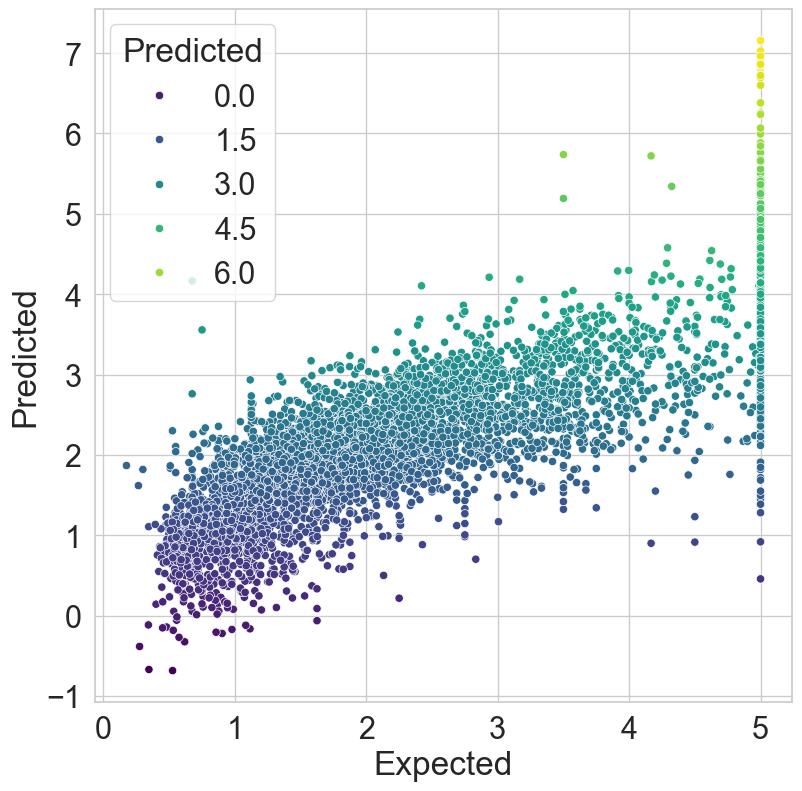

In [326]:
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='viridis', legend=True)

In [327]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

In [328]:
axes.set_xlim(start, end)

(-0.6830978604144562, 7.155719818496834)

In [329]:
axes.set_ylim(start, end)

(-0.6830978604144562, 7.155719818496834)

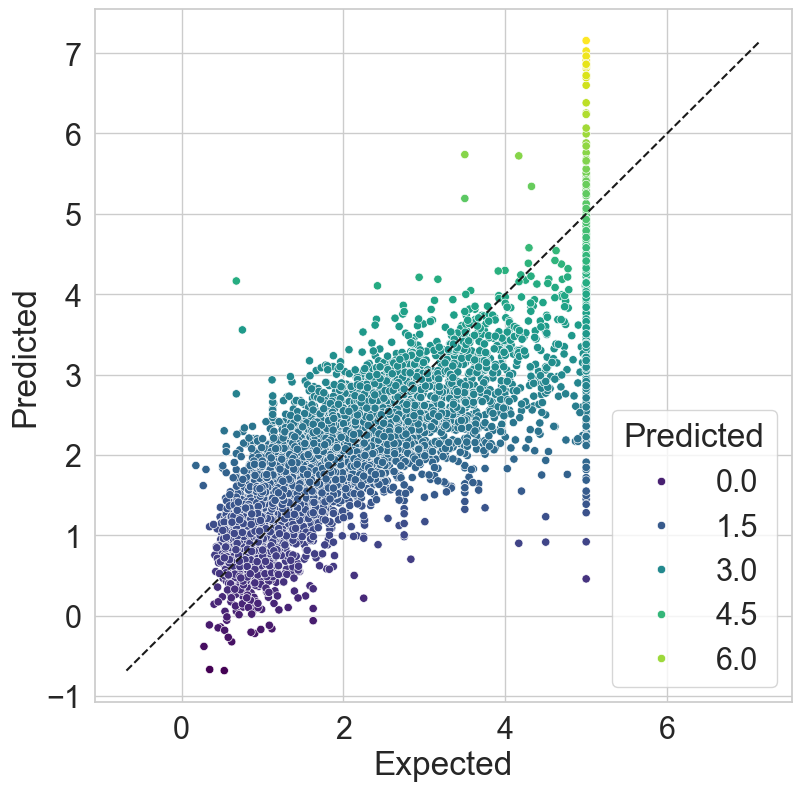

In [330]:
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='viridis', legend=True)
line = plt.plot([start, end], [start, end], 'k--')

### Section 9 - Regression Model Metrics

In [331]:
metrics.r2_score(expected, predicted)

0.6008983115964333

In [332]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449119

### Section 10 - Choosing the Best Model

In [335]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [337]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}:' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression:mean of r2 scores=0.599
      ElasticNet:mean of r2 scores=0.423
           Lasso:mean of r2 scores=0.285
           Ridge:mean of r2 scores=0.599
